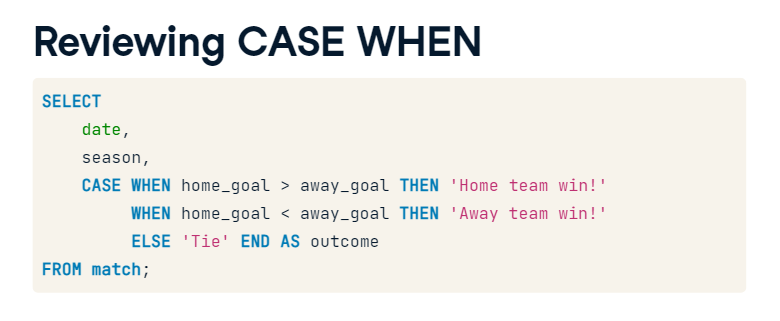
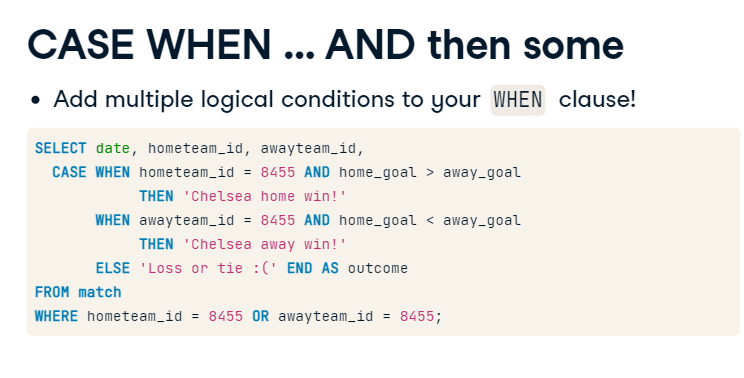
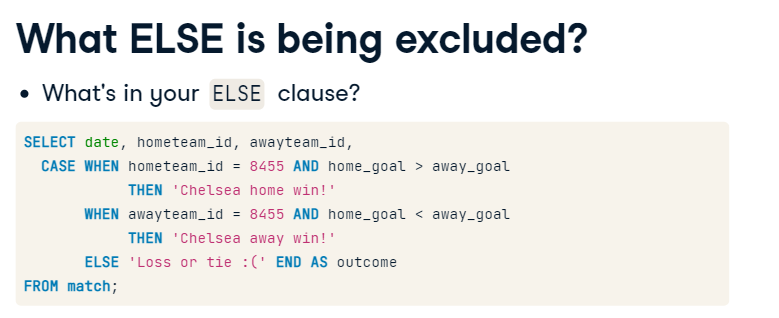
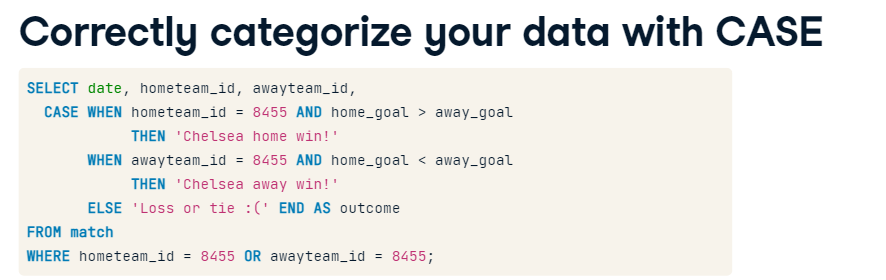
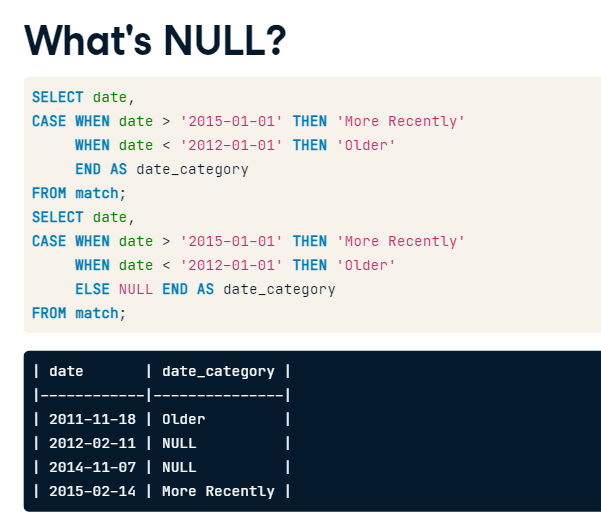
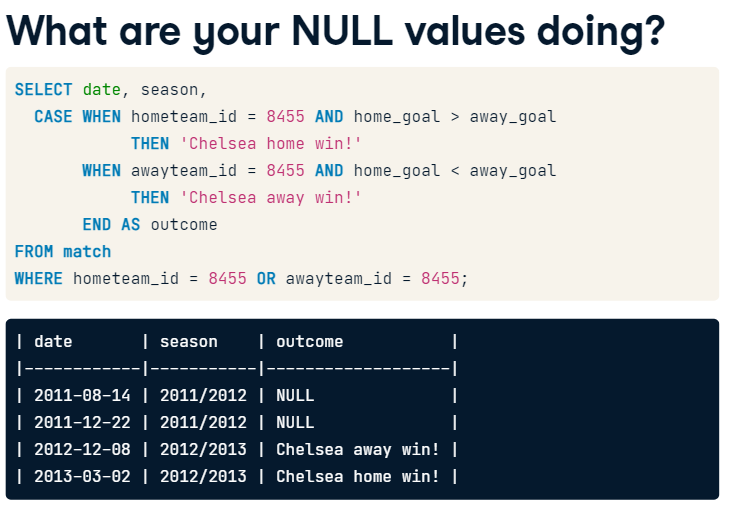
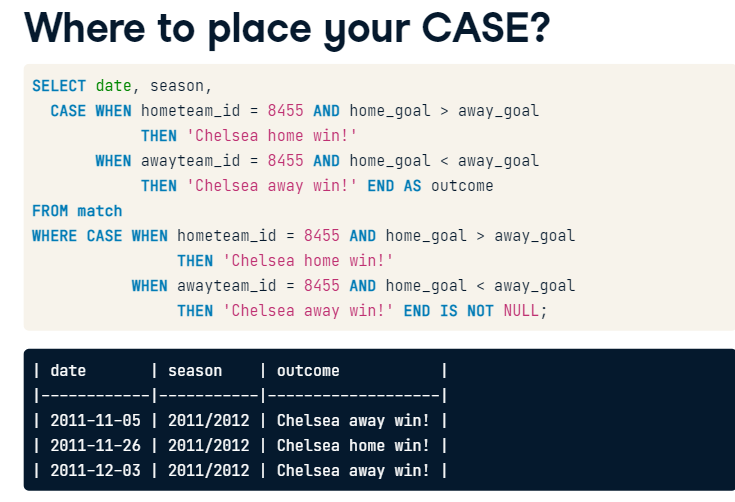
#### In CASE of rivalry
Barcelona and Real Madrid have been rival teams for more than 80 years. Matches between these two teams are given the name El Clásico (The Classic). In this exercise, you will query a list of matches played between these two rivals.

You will notice in Step 2 that when you have multiple logical conditions in a CASE statement, you may quickly end up with a large number of WHEN clauses to logically test every outcome you are interested in. It's important to make sure you don't accidentally exclude key information in your ELSE clause.

In this exercise, you will retrieve information about matches played between Barcelona (id = 8634) and Real Madrid (id = 8633). Note that the query you are provided with already identifies the Clásico matches using a filter in the WHERE clause.


- Complete the first CASE statement, identifying Barcelona or Real Madrid as the home team using the hometeam_id column.
- Complete the second CASE statement in the same way, using awayteam_id.

```sql
SELECT 
	date,
	-- Identify the home team as Barcelona or Real Madrid
	CASE WHEN hometeam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END AS home,
    -- Identify the away team as Barcelona or Real Madrid
	CASE WHEN awayteam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END AS away
FROM matches_spain
WHERE (awayteam_id = 8634 OR hometeam_id = 8634)
      AND (awayteam_id = 8633 OR hometeam_id = 8633);
```

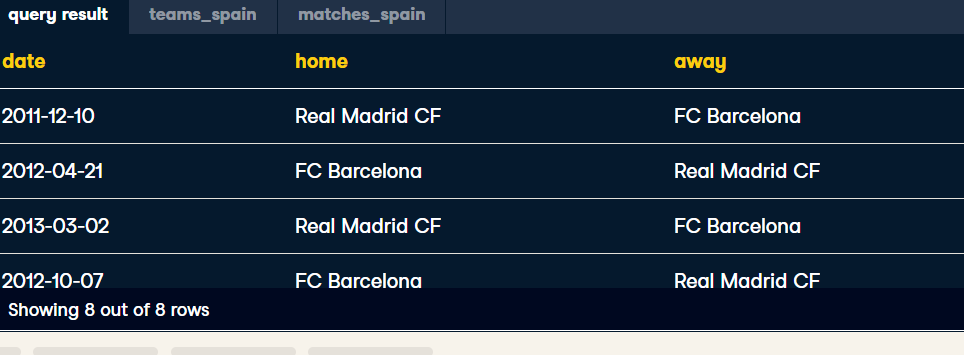


- Construct the final CASE statement identifying who won each match. Note there are 3 possible outcomes, but 5 conditions that you need to identify.
- Fill in the logical operators to identify Barcelona or Real Madrid as the winner.
```sql
SELECT 
	date,
	CASE WHEN hometeam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END as home,
	CASE WHEN awayteam_id = 8634 THEN 'FC Barcelona' 
         ELSE 'Real Madrid CF' END as away,
	-- Identify all possible match outcomes
	CASE WHEN home_goal > away_goal AND hometeam_id = 8634 THEN 'Barcelona win!'
        WHEN home_goal > away_goal AND hometeam_id = 8633 THEN 'Real Madrid win!'
        WHEN home_goal < away_goal AND awayteam_id = 8634 THEN 'Barcelona win!'
        WHEN home_goal < away_goal AND awayteam_id = 8633 THEN 'Real Madrid win!'
        ELSE 'Tie!' END AS outcome
FROM matches_spain
WHERE (awayteam_id = 8634 OR hometeam_id = 8634)
      AND (awayteam_id = 8633 OR hometeam_id = 8633);
```

#### Filtering your CASE statement
Let's generate a list of matches won by Italy's Bologna team! There are quite a few additional teams in the two tables, so a key part of generating a usable query will be using your CASE statement as a filter in the WHERE clause.

CASE statements allow you to categorize data that you're interested in -- and exclude data you're not interested in. In order to do this, you can use a CASE statement as a filter in the WHERE statement to remove output you don't want to see.

Here is how you might set that up:
```sql
SELECT *
FROM table
WHERE 
    CASE WHEN a > 5 THEN 'Keep'
         WHEN a <= 5 THEN 'Exclude' END = 'Keep';
```
In essence, you can use the CASE statement as a filtering column like any other column in your database. The only difference is that you don't alias the statement in WHERE.


- Identify Bologna's team ID listed in the teams_italy table by selecting the team_long_name and team_api_id.

```sql
-- Select team_long_name and team_api_id from team
SELECT
	team_long_name,
	team_api_id
FROM teams_italy
-- Filter for team name
WHERE team_long_name	 = 'Bologna';
```
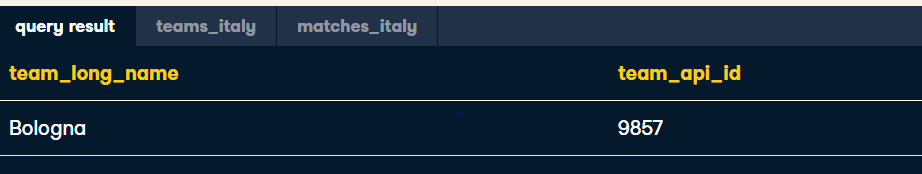


- Select the season and date that a match was played.
- Complete the CASE statement so that only Bologna's home and away wins are identified.

```sql
-- Select the season and date columns
SELECT 
	season,
	date,
    -- Identify when Bologna won a match
	CASE WHEN hometeam_id = 9857 AND home_goal > away_goal THEN 'Bologna Win'
		WHEN awayteam_id = 9857 AND away_goal > home_goal THEN 'Bologna Win' 
		END AS outcome
FROM matches_italy;
```
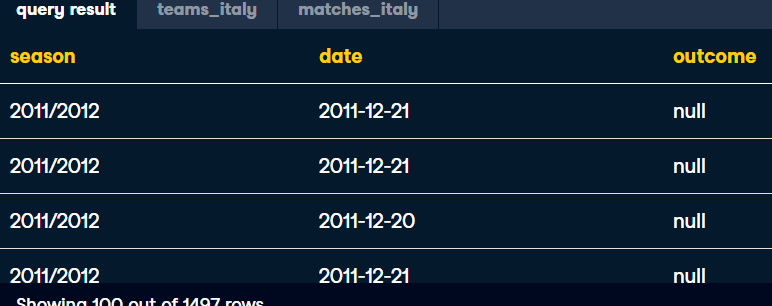

- Select the home_goal and away_goal for each match.
- Use the CASE statement in the WHERE clause to filter all NULL values generated by the statement in the previous step.

```sql
-- Select the season, date, home_goal, and away_goal columns
SELECT 
	season,
	date,
	home_goal,
	away_goal
FROM matches_italy
WHERE
-- Exclude games not won by Bologna
	CASE WHEN hometeam_id = 9857 AND home_goal > away_goal THEN 'Bologna Win'
         WHEN awayteam_id = 9857 AND away_goal > home_goal THEN 'Bologna Win' 
         END IS NOT NULL;
```
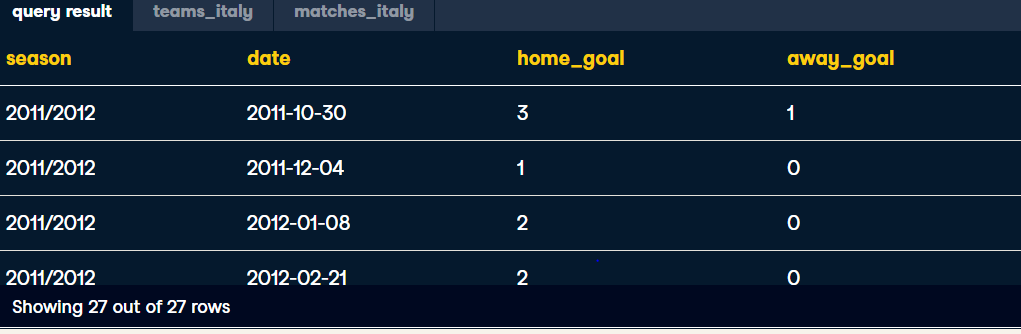
